Epoch: 1 | loss: 0.7155269980430603 | test loss: 0.7379710078239441 | accuracy: tensor([0.4667])
Epoch: 2 | loss: 0.7150080800056458 | test loss: 0.7372234463691711 | accuracy: tensor([0.4667])
Epoch: 3 | loss: 0.7144951820373535 | test loss: 0.736481785774231 | accuracy: tensor([0.4667])
Epoch: 4 | loss: 0.7139883041381836 | test loss: 0.7357463240623474 | accuracy: tensor([0.4667])
Epoch: 5 | loss: 0.7134873270988464 | test loss: 0.7350170016288757 | accuracy: tensor([0.4667])
Epoch: 6 | loss: 0.7129924297332764 | test loss: 0.7342939972877502 | accuracy: tensor([0.4667])
Epoch: 7 | loss: 0.7125034332275391 | test loss: 0.7335773706436157 | accuracy: tensor([0.4667])
Epoch: 8 | loss: 0.7120208740234375 | test loss: 0.7328673005104065 | accuracy: tensor([0.4667])
Epoch: 9 | loss: 0.7115444540977478 | test loss: 0.7321637868881226 | accuracy: tensor([0.4667])
Epoch: 10 | loss: 0.7110745310783386 | test loss: 0.7314670085906982 | accuracy: tensor([0.4667])
Epoch: 11 | loss: 0.7106106281

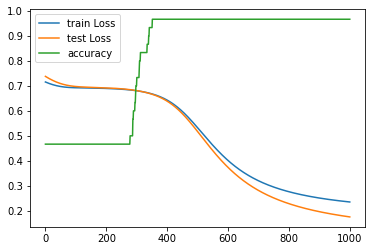

In [4]:
import torch as T
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv(r'D:\DATASCIENCE\DeepLearning-DS\Chapter 03\01. MLP Binary Classification\data.csv', header=None)

# print(df.head())

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_layer = nn.Linear(2, 16)  # input = num of features, out up to you
        self.hidden1 = nn.Linear(16, 8) # input = out of previus layer, output up to you
        self.hidden2 = nn.Linear(8, 4) # input = out of previus layer, output up to you
        self.output = nn.Linear(4, 1) # input = out of previus layer, it depends on the task
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x): #forwardpass
        first_layer = self.input_layer(x)
        act1 = self.sigmoid(first_layer)
        second_layer = self.hidden1(act1)
        act2 = self.sigmoid(second_layer)
        third_layer = self.hidden2(act2)
        act3 = self.sigmoid(third_layer)
        out_layer = self.output(act3)
        # prediction = self.sigmoid(out_layer)
        return self.sigmoid(out_layer)


model = Classifier()

criterion = nn.BCELoss()
optimizer = T.optim.Adam(model.parameters(), lr=1e-3) # 0.001 1 * 10^-3

X = T.from_numpy(df[[0, 1]].values).float()
y = T.from_numpy(df[[2]].values).float()

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=73)

epochs = 1000

train_losses = []
test_losses = []
accuracies = []

for epoch in range(epochs):

    optimizer.zero_grad()   # 1st step: reset the gradients

    pred = model.forward(x_train) #2nd step: make the prediction

    train_loss = criterion(pred, y_train)   #3rd step: compute the loss

    train_loss.backward() #4th step: backward pass

    optimizer.step() #5th step: save the weights

    model.eval()
    with T.no_grad():
        test_pred = model.forward(x_test)

        test_loss = criterion(test_pred, y_test)

        classes = test_pred > 0.5

        acc = sum(classes == y_test) / classes.shape[0]

    model.train()

    train_losses.append(train_loss.item())
    test_losses.append(test_loss.item())
    accuracies.append(acc)
    print(f'Epoch: {epoch + 1} | loss: {train_loss.item()} | test loss: {test_loss.item()} | accuracy: {acc}')


plt.plot(train_losses, label='train Loss')
plt.plot(test_losses, label='test Loss')
plt.plot(accuracies, label='accuracy')
plt.legend()
plt.show()



In [3]:
df

,0.78051,-0.063669,1
0,0.28774,0.29139,1
1,0.40714,0.17878,1
2,0.29230,0.42170,1
3,0.50922,0.35256,1
4,0.27785,0.10802,1
...,...,...,...
94,0.77029,0.70140,0
95,0.73156,0.71782,0
96,0.44556,0.57991,0
97,0.85275,0.85987,0


In [1]:
import torch as T
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# create a neural network class inheriting from the nn.Module
# Call it NeuralNetwork and make, and use "pass" in the constructor
# so that it doesn't give an error
# Instantiate one instance of it in variable net

net = 0

class NeuralNetwork(nn.Module):
    def __init__(self ):
        super(NeuralNetwork, self).__init__()
        pass

net = NeuralNetwork()

In [ ]:
assert isinstance(net, NeuralNetwork)

In [ ]:
# Rewrite the NeuralNetwork class so that the constructor receives
# as input the input_dim and num_hidden, respectively the dimension of 
# the input and the number of hidden neurons
# use pass again

class NeuralNetwork(nn.Module):
    pass
    def __init__(self, input_dim, num_hidden):
        super(NeuralNetwork).__init__()
        pass


In [ ]:
assert NeuralNetwork(input_dim=10, num_hidden=16)

In [ ]:
# Rewrite the NeuralNetwork class so that the constructor receives
# as input the input_dim, num_hidden1 and num_hidden2, respectively the dimension of 
# the input and the number of hidden neurons for the first fully connected
# layer and the second. Define the attributes in the constructor
# that consists of the layers, call them fc1, fc2 and fc3 and a sigmoid.
# use pass again. Be careful to put the dimensions in the right places!
# Since we will do a binary classification problem, fc3 will have 1 neuron
# as output

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, num_hidden1, num_hidden2):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, num_hidden1)
        self.fc2 = nn.Linear(num_hidden1, num_hidden2)
        self.fc3 = nn.Linear(num_hidden2, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        layer1 = self.fc1(x)
        act1 = self.sigmoid(layer1)
        layer2 = self.fc2(act1)
        act2 = self.sigmoid(layer2)
        layer3 = self.fc3(act2)
        out = self.sigmoid(layer3)
        return out
        
        

In [ ]:
net = NeuralNetwork(16, 16, 16)
assert net.fc1
assert net.fc2
assert net.fc3
assert net.sigmoid

In [ ]:
# Define the forward pass to make a reasonable use of the attributes
# you defined before. Follow the same reasoning we used in class

model = NeuralNetwork(10, 7, 8)


In [ ]:
model.parameters()

In [ ]:
# For training a model, use the following optimizer and loss

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss = nn.BCELoss()


In [ ]:
# train a neural network (feel free to choose the num_hidden1 and num_hidden2)
# on the dataset in data.csv file
# You'll have fun with conflicting shapes and types and tensors, but
# you'll get those errors anyway. Let's go into the wild and learn
# by reading the errors and trying to understand them! :)
# You can always use the provided Workbook